## Import related functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from time import sleep
from tqdm import tqdm
import os
from Bio import pairwise2
from Bio.Seq import Seq
from pandarallel import pandarallel
import sys
sys.path.append(r'./script/')
from protein_sequence_alignment import *

### input and output file

In [2]:
data_folder = './DATA/'
Swiss_Prot_Entry_EC_file = './basic_data/Entry-EC-reviewed.tsv'
uniprot_file = os.path.join(data_folder,'Dataset_0724.csv')

sequence_alignment_outfile = os.path.join(data_folder,'EC_label_greater_than_2_sequence_alignment_identity.csv')
histogram_same_label_file = os.path.join(data_folder,'figures','same_label_indentity_histogram.png')
histogram_diff_label_file = os.path.join(data_folder,'figures','different_label_indentity_histogram.png')

### uniprot结果

In [3]:
result = analyze_uniprot_data(uniprot_file, Swiss_Prot_Entry_EC_file)
result

Loaded Uniprot data shape: (114808, 2)
Filtered out rows with NaN in Swiss-Prot EC number column. Remaining rows: 274501
Merge Uniprot dataset with Swiss-Prot: (89560, 3)
Filtered data with length greater than 2. Number of rows: 145


,EC number,uniprot_label,Entry,length,uniprot_label_set,length_set
46,1.1.1.2,"[1, 1, 2, 1, 1, 4, 1, 2, 1, 1, 1, 1, 2, 4]","[O70473, P14550, P25377, P50578, P51635, P7472...",14,"[1, 2, 4]",3
54,1.1.1.209,"[2, 2, 2, 1, 2, 1, 2, 4, 1, 1, 4, 4, 1, 2, 1, ...","[O54909, O55240, O75452, P17516, P50170, Q0482...",19,"[1, 2, 4]",3
126,1.1.1.35,"[4, 4, 4, 2, 1, 1, 1, 2, 1, 1, 1, 4, 1, 2, 2]","[O02691, O08756, O70351, P00348, P07896, P5510...",15,"[1, 2, 4]",3
140,1.1.1.37,"[2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[F1C7I4, O43175, O82399, O88989, P00346, P0463...",207,"[1, 2, 4, 8]",4
173,1.1.1.48,"[4, 4, 1, 2]","[O93715, P13203, Q53TZ2, P11886]",4,"[1, 2, 4]",3
...,...,...,...,...,...,...
2698,5.5.1.4,"[4, 3, 1, 4, 4, 4, 4]","[P11986, Q6AYK3, Q8NLE6, J9VYL3, P42800, Q8A7J...",7,"[1, 3, 4]",3
2727,6.1.1.7,"[2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, ...","[O28029, P00957, P36428, P40825, P49588, P5047...",76,"[1, 2, 4]",3
2757,6.3.1.2,"[8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 8, 6, 8, 8, 8,...","[P14654, P14655, P14656, P32288, Q43127, Q9LVI...",76,"[6, 8, 12]",3
2771,6.3.2.3,"[4, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, ...","[P04425, P46413, P48637, P51855, Q08220, Q8DXM...",27,"[1, 2, 4]",3


### 相同EC下的蛋白做序列比对

In [4]:
# Compute the Cartesian product of entries sharing the same EC number and incorporate their respective sequences.
result1 = create_protein_pairs_with_sequences(result, uniprot_file)

In [5]:
# Perform pairwise global alignment to calculate sequence identity between every pair of entries.
result1 = calculate_and_save_sequence_identity(result1, sequence_alignment_outfile)

INFO: Pandarallel will run on 30 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


### Sequence Identity Histograms

In [6]:
result1 = pd.read_csv('./DATA/EC_label_greater_than_2_sequence_alignment_identity.csv')
result1

,EC number,entry1,entry1_label,seq1,entry2,entry2_label,seq2,identity,label_match
0,1.1.1.2,O70473,1,MASCVLLHTGQKMPLIGLGTWKSNPGQVKAAIKYALSVGYRHIDCA...,P14550,1,MAASCVLLHTGQKMPLIGLGTWKSEPGQVKAAVKYALSVGYRHIDC...,89.766082,True
1,1.1.1.2,O70473,1,MASCVLLHTGQKMPLIGLGTWKSNPGQVKAAIKYALSVGYRHIDCA...,P25377,2,MLYPEKFQGIGISNAKDWKHPKLVSFDPKPFGDHDVDVEIEACGIC...,22.759857,False
2,1.1.1.2,O70473,1,MASCVLLHTGQKMPLIGLGTWKSNPGQVKAAIKYALSVGYRHIDCA...,P50578,1,MAASCVLLHTGQKMPLIGLGTWKSEPGQVKAAIKYALTVGYRHIDC...,85.428571,True
3,1.1.1.2,O70473,1,MASCVLLHTGQKMPLIGLGTWKSNPGQVKAAIKYALSVGYRHIDCA...,P51635,1,MTASSVLLHTGQKMPLIGLGTWKSEPGQVKAAIKYALSVGYRHIDC...,90.322581,True
4,1.1.1.2,O70473,1,MASCVLLHTGQKMPLIGLGTWKSNPGQVKAAIKYALSVGYRHIDCA...,P74721,4,MIKAYAALEANGKLQPFEYDPGALGANEVEIEVQYCGVCHSDLSMI...,21.996303,False
...,...,...,...,...,...,...,...,...,...
3253649,6.3.2.6,P0A7E0,3,MQKQAELYRGKAKTVYSTENPDLLVLEFRNDTSAGDGARIEQFDRK...,Q9DCL9,8,MATAVVVNIGKKLYEGKTKEVYELLDTPGRVLLQSKDQITAGNAAR...,22.140221,False
3253650,6.3.2.6,P0A7E0,3,MQKQAELYRGKAKTVYSTENPDLLVLEFRNDTSAGDGARIEQFDRK...,Q9I7S8,8,MSTTTTASIEGYKLGKVIIEGKTKQVYDLPEQPGLCLLLSKDRITA...,22.878229,False
3253651,6.3.2.6,P0A7E0,3,MQKQAELYRGKAKTVYSTENPDLLVLEFRNDTSAGDGARIEQFDRK...,P38024,8,MAPAASELKLGKKVNEGKTKEVYELPDIPGCVLMQSKDQITAGNAA...,22.777778,False
3253652,6.3.2.6,P0A7E0,3,MQKQAELYRGKAKTVYSTENPDLLVLEFRNDTSAGDGARIEQFDRK...,P0A7D8,3,MQKQAELYRGKAKTVYSTENPDLLVLEFRNDTSAGDGARIEQFDRK...,100.000000,True


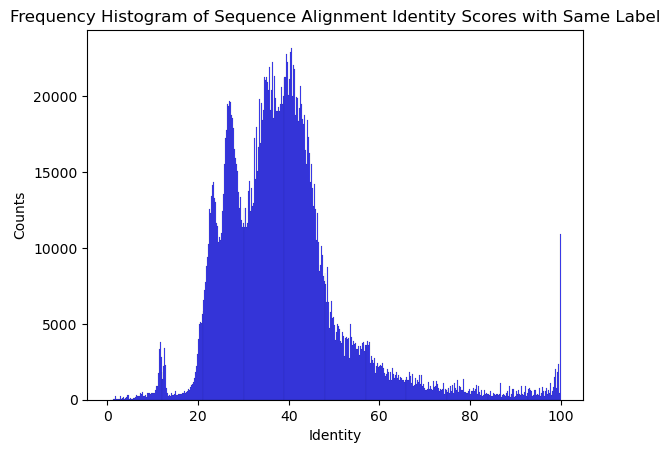

In [7]:
plot_and_save_histogram_same_label(result1, histogram_same_label_file)

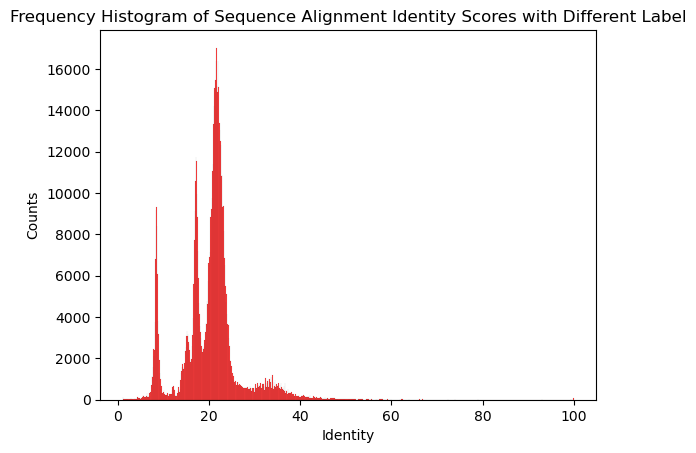

In [8]:
plot_and_save_histogram_diff_label(result1, histogram_diff_label_file)